In [1]:
# Importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as      plt
import statsmodels.tools.eval_measures as em
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
from   pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
import sklearn
import statsmodels
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data & Telling Python that the column 'YearMonth' is time series & Making time column as index. By making index work gets easy
bgl = pd.read_csv('SoftDrink.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [3]:
bgl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [4]:
bgl.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [5]:
bgl.tail()

,SoftDrinkProduction
YearMonth,
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937
1995-06-01,4365
1995-07-01,4290


In [6]:
#descriptive statistics information
round(bgl.describe(),3)

,SoftDrinkProduction
count,187.000
mean,3262.610
std,728.357
min,1954.000
25%,2748.000
50%,3134.000
75%,3741.000
max,5725.000


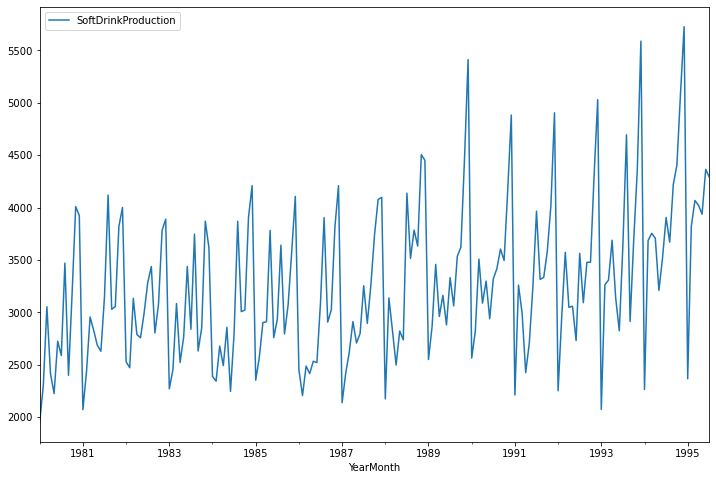

In [7]:
#Visualization the data: Plot the time series
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
bgl.plot()
plt.show()

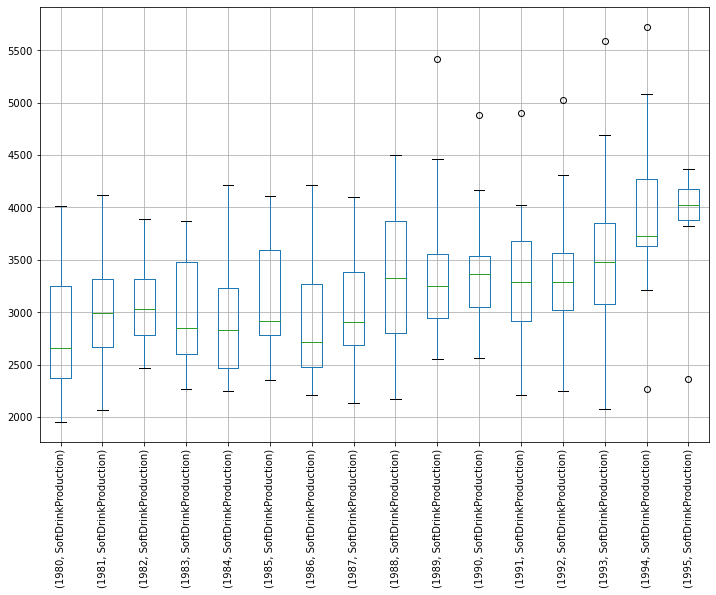

In [8]:
fig, axe = plt.subplots()
bgl.loc[:,[('SoftDrinkProduction')]].groupby(bgl.index.map(lambda x: x.year)).boxplot(ax=axe, subplots=False, rot=90)
plt.show()

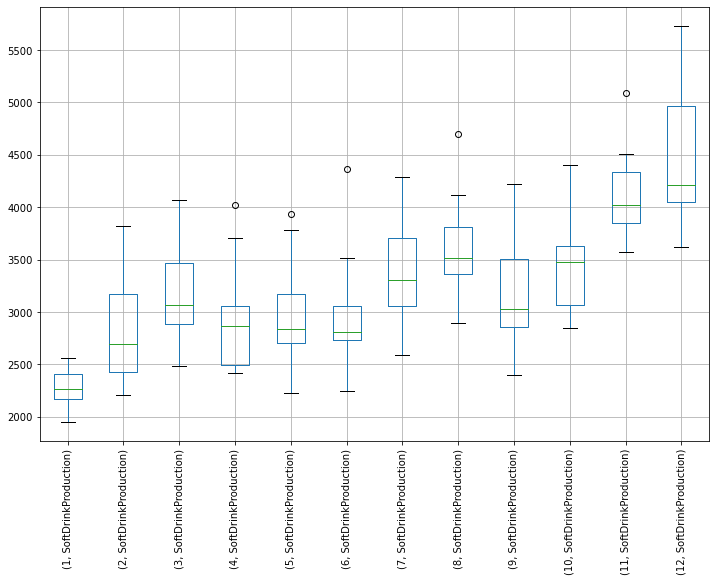

In [9]:
fig, axe = plt.subplots()
bgl.loc[:,[('SoftDrinkProduction')]].groupby(bgl.index.map(lambda x: x.month)).boxplot(ax=axe, subplots=False, rot=90)
plt.show()

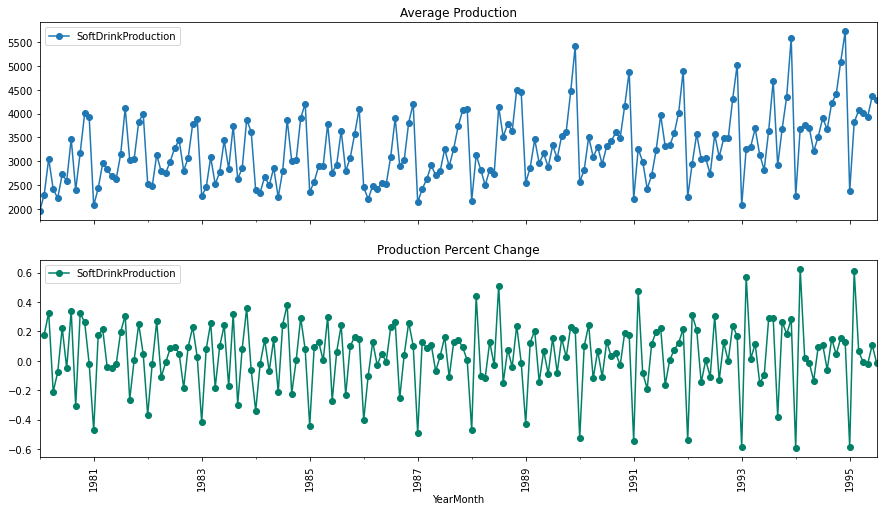

In [10]:
# group by date and get average production, and precent change
average_prod    = bgl.groupby('YearMonth')["SoftDrinkProduction"].mean()
pct_change_prod = bgl.groupby('YearMonth')["SoftDrinkProduction"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average production over time(year-month)
ax1 = average_prod.plot(legend=True,ax=axis1,marker='o',title="Average Production")
ax1.set_xticks(range(len(average_prod)))
ax1.set_xticklabels(average_prod.index.tolist(), rotation=90)
# plot precent change for production over time(year-month)
ax2 = pct_change_prod.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Production Percent Change")

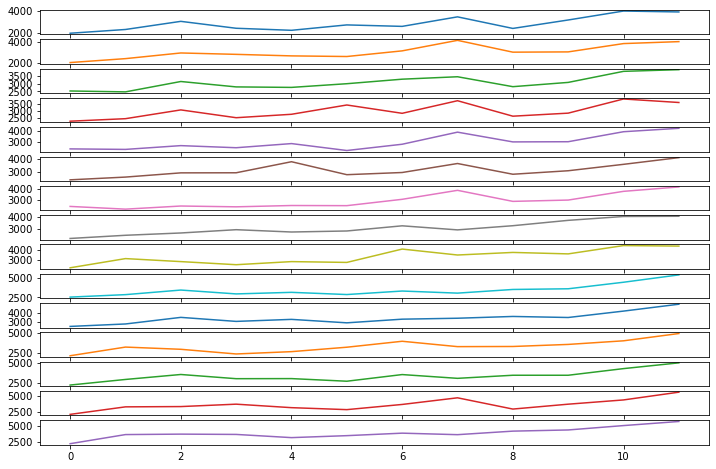

In [11]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('softdrink.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.drop(series.tail(7).index,inplace=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

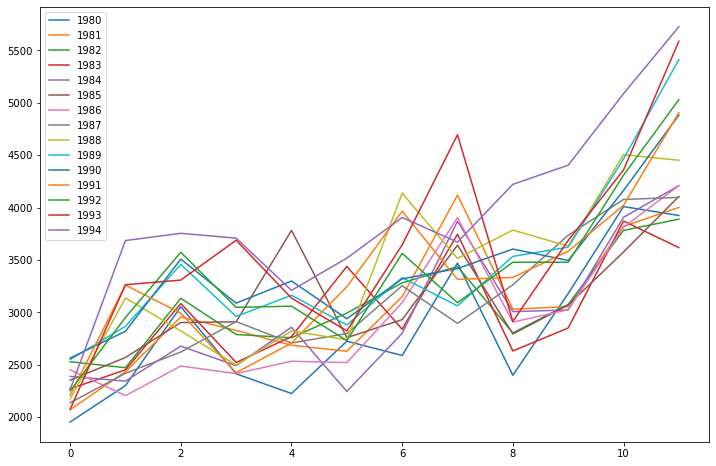

In [12]:
years.plot()
pyplot.show()

In [13]:
#Decompose the time series additively
bgl_add_decompose = seasonal_decompose(bgl, model = 'additive', period = 12)

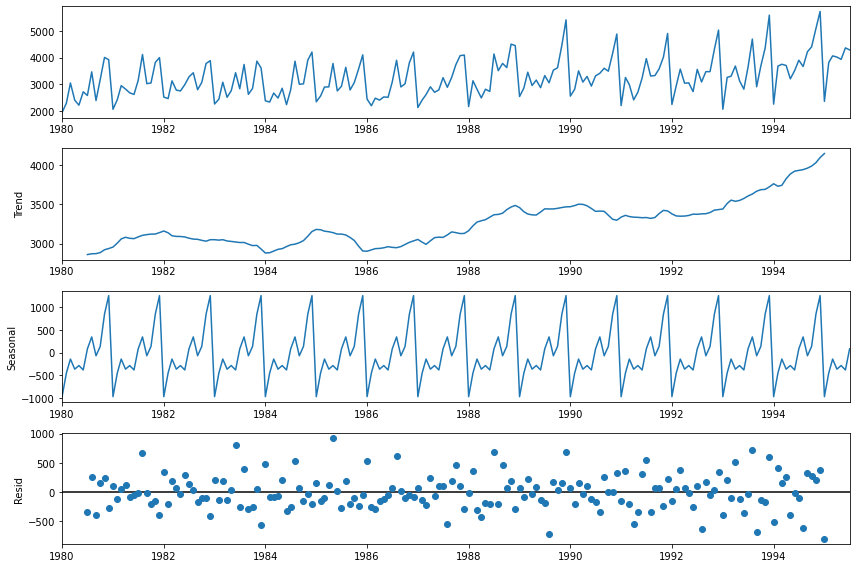

In [14]:
#Plot the decomposed series
bgl_add_decompose.plot()
plt.show()

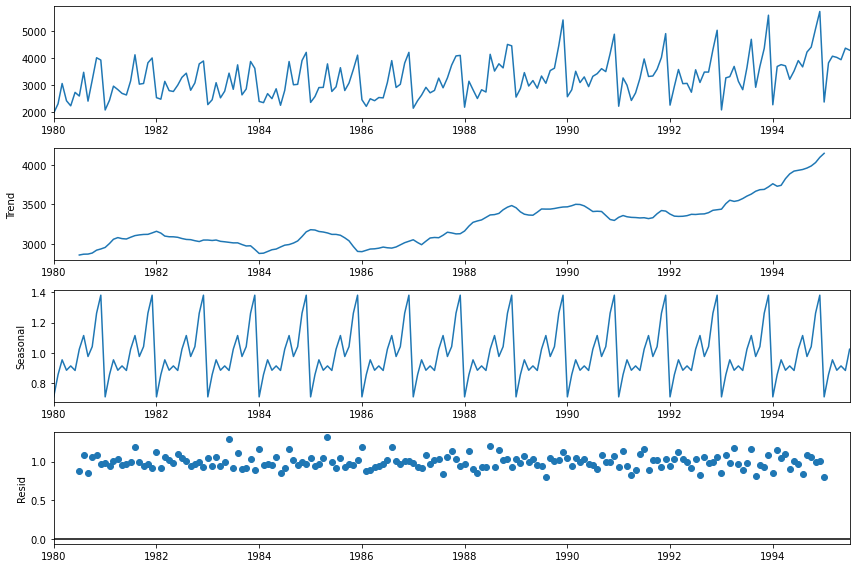

In [15]:
#Decompose the time series multiplicative
bgl_mul_decompose = seasonal_decompose(bgl, model = 'multiplicative', period = 12)
#Plotting the graph
bgl_mul_decompose.plot()
plt.show()

In [16]:
#How to understand which one is good for us. Is it additive or multiplicative

In [17]:
#Let's try to do log transformation
bgl_log = bgl.copy()

In [18]:
bgl_log['Pax'] = np.log(bgl)

In [19]:
bgl_log.Pax

YearMonth
1980-01-01    7.577634
1980-02-01    7.741534
1980-03-01    8.024207
1980-04-01    7.789040
1980-05-01    7.707962
                ...   
1995-03-01    8.310661
1995-04-01    8.299535
1995-05-01    8.278174
1995-06-01    8.381373
1995-07-01    8.364042
Name: Pax, Length: 187, dtype: float64

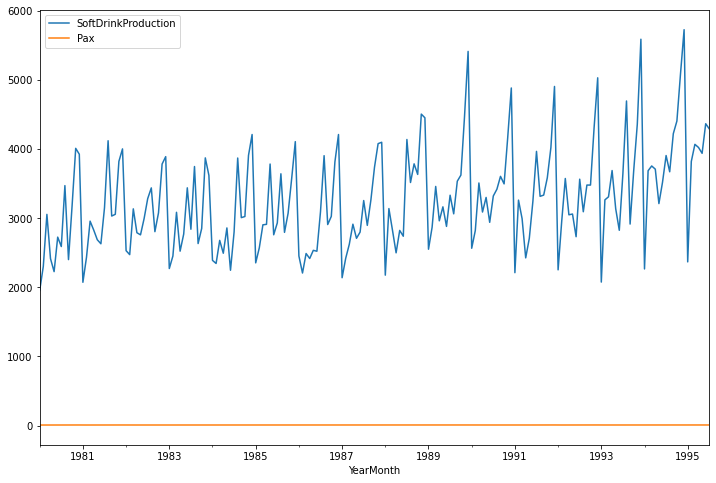

In [20]:
#Visualize the log transformed series
bgl_log.plot()
plt.show()

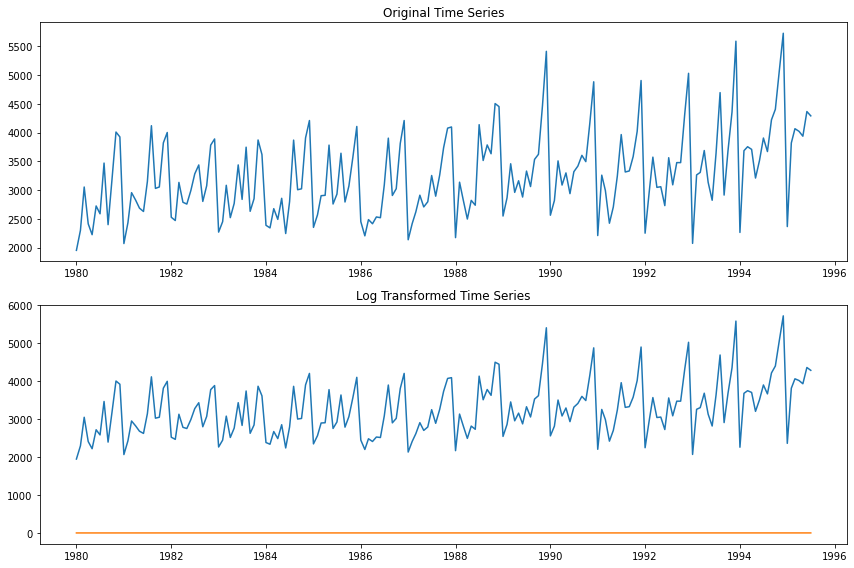

In [21]:
#Compare with original
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(bgl)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(bgl_log)
plt.tight_layout()

Split the data into train and test and plot the training and test data. The test data should start in 1991

In [22]:
train = bgl[bgl.index<'1991'] 
test = bgl[bgl.index>='1991']

In [23]:
train.head(5)

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [24]:
test.head()

,SoftDrinkProduction
YearMonth,
1991-01-01,2211
1991-02-01,3260
1991-03-01,2992
1991-04-01,2425
1991-05-01,2707


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  55 non-null     int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [27]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [28]:
132+55

187

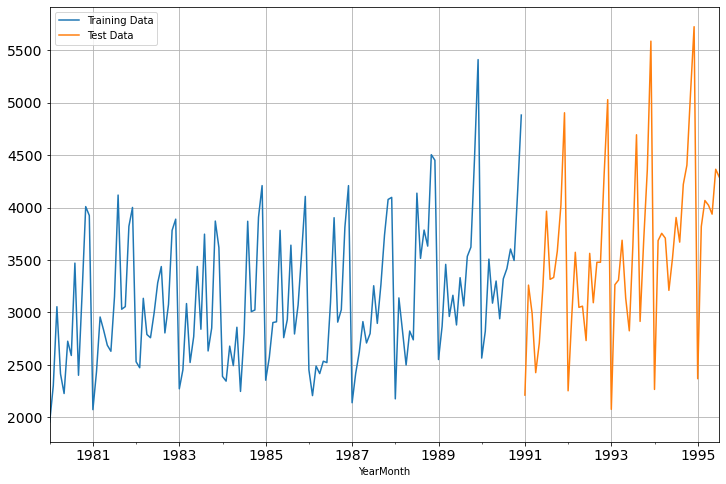

In [29]:
train['SoftDrinkProduction'].plot(fontsize=14)
test['SoftDrinkProduction'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

### SES -  ETS(A, N, N) (Level, No Seasonality, No Trend) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [30]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [31]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [32]:
## Let us check the parameters
model_SES_autofit.params

{'smoothing_level': 0.11907309094689855,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2573.0166666666655,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Value of Alpha (Smoothing_Level) is 0.119073.

In [33]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    3656.847753
1991-02-01    3656.847753
1991-03-01    3656.847753
1991-04-01    3656.847753
1991-05-01    3656.847753
1991-06-01    3656.847753
1991-07-01    3656.847753
1991-08-01    3656.847753
1991-09-01    3656.847753
1991-10-01    3656.847753
1991-11-01    3656.847753
1991-12-01    3656.847753
1992-01-01    3656.847753
1992-02-01    3656.847753
1992-03-01    3656.847753
1992-04-01    3656.847753
1992-05-01    3656.847753
1992-06-01    3656.847753
1992-07-01    3656.847753
1992-08-01    3656.847753
1992-09-01    3656.847753
1992-10-01    3656.847753
1992-11-01    3656.847753
1992-12-01    3656.847753
1993-01-01    3656.847753
1993-02-01    3656.847753
1993-03-01    3656.847753
1993-04-01    3656.847753
1993-05-01    3656.847753
1993-06-01    3656.847753
1993-07-01    3656.847753
1993-08-01    3656.847753
1993-09-01    3656.847753
1993-10-01    3656.847753
1993-11-01    3656.847753
1993-12-01    3656.847753
1994-01-01    3656.847753
1994-02-01    3656.847753
1994-03-01  

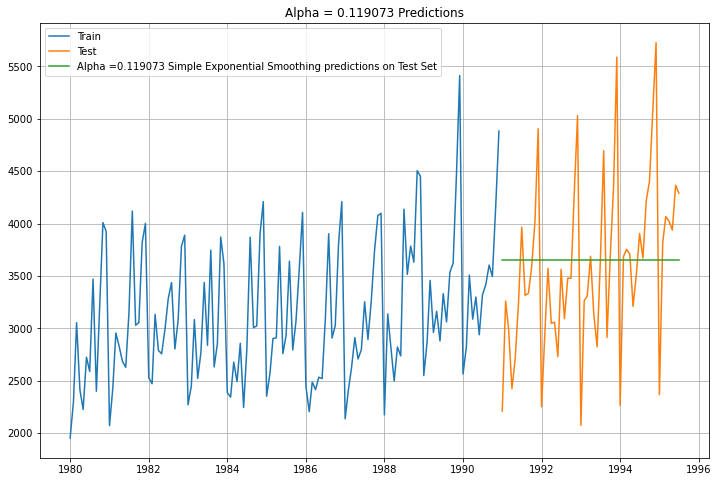

In [34]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.119073 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.119073 Predictions');

In [35]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [36]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 809.5016403931278
SES RMSE (calculated using statsmodels): 809.5016403931279


In [37]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.119073,SES'])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.50164


## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [38]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1242286864966588, 'smoothing_trend': 0.10769076164072929, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 2142.9200400852947, 'initial_trend': 42.27465415028941, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Value of Alpha (Smoothing_Level) is 0.124228
Value of Beta (Smoothing_Trend) is 0.107690

In [39]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    3727.184397
1991-02-01    3751.450885
1991-03-01    3775.717372
1991-04-01    3799.983860
1991-05-01    3824.250348
1991-06-01    3848.516836
1991-07-01    3872.783323
1991-08-01    3897.049811
1991-09-01    3921.316299
1991-10-01    3945.582787
1991-11-01    3969.849274
1991-12-01    3994.115762
1992-01-01    4018.382250
1992-02-01    4042.648738
1992-03-01    4066.915225
1992-04-01    4091.181713
1992-05-01    4115.448201
1992-06-01    4139.714689
1992-07-01    4163.981176
1992-08-01    4188.247664
1992-09-01    4212.514152
1992-10-01    4236.780640
1992-11-01    4261.047127
1992-12-01    4285.313615
1993-01-01    4309.580103
1993-02-01    4333.846591
1993-03-01    4358.113078
1993-04-01    4382.379566
1993-05-01    4406.646054
1993-06-01    4430.912541
1993-07-01    4455.179029
1993-08-01    4479.445517
1993-09-01    4503.712005
1993-10-01    4527.978492
1993-11-01    4552.244980
1993-12-01    4576.511468
1994-01-01    4600.777956
1994-02-01    4625.044443
1994-03-01  

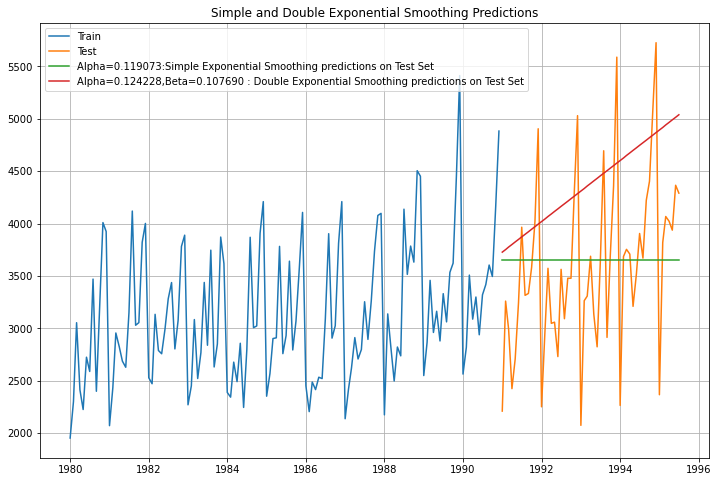

In [40]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.119073:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.124228,Beta=0.107690 : Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [41]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 1074.3291531501832


In [42]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]},index=['Alpha=1,Beta=0.0189:DES'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153


### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [43]:
# Initializing the Triple Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.14628214287204402, 'smoothing_trend': 0.03985523474431963, 'smoothing_seasonal': 0.2624197351602548, 'damping_trend': nan, 'initial_level': 2803.214611111109, 'initial_trend': 7.179638888889087, 'initial_seasons': array([-687.29896528, -582.87175694,  -55.66104861, -365.74079861,
       -253.26738194, -196.41738194,  -32.54725694,  690.31611806,
       -282.20021528,   44.75545139,  867.40386806,  853.53236806]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Value of Alpha: 0.146282 Value of Beta: 0.039855 Value of Gamma: 0.262419

In [44]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    2573.415543
1991-02-01    2891.897210
1991-03-01    3287.593195
1991-04-01    2999.142548
1991-05-01    3206.039305
1991-06-01    3006.265950
1991-07-01    3541.746047
1991-08-01    3623.036399
1991-09-01    3615.247075
1991-10-01    3664.034781
1991-11-01    4383.017533
1991-12-01    4761.313125
1992-01-01    2626.715237
1992-02-01    2945.196904
1992-03-01    3340.892889
1992-04-01    3052.442242
1992-05-01    3259.338999
1992-06-01    3059.565644
1992-07-01    3595.045740
1992-08-01    3676.336093
1992-09-01    3668.546769
1992-10-01    3717.334475
1992-11-01    4436.317227
1992-12-01    4814.612818
1993-01-01    2680.014931
1993-02-01    2998.496597
1993-03-01    3394.192583
1993-04-01    3105.741935
1993-05-01    3312.638693
1993-06-01    3112.865338
1993-07-01    3648.345434
1993-08-01    3729.635787
1993-09-01    3721.846463
1993-10-01    3770.634169
1993-11-01    4489.616921
1993-12-01    4867.912512
1994-01-01    2733.314625
1994-02-01    3051.796291
1994-03-01  

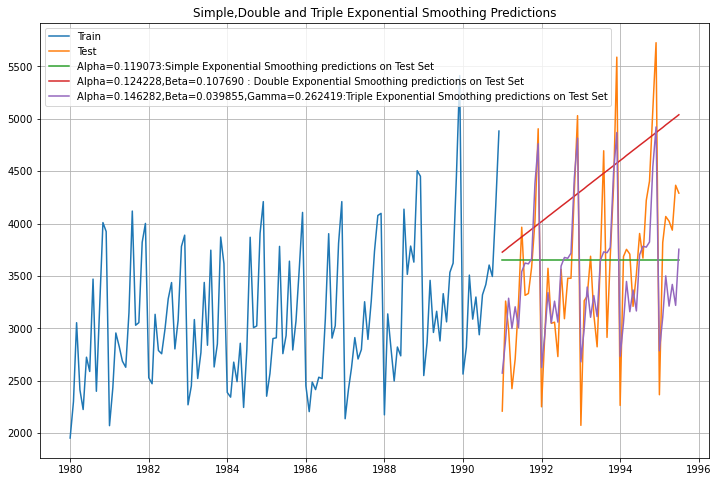

In [45]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.119073:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.124228,Beta=0.107690 : Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.146282,Beta=0.039855,Gamma=0.262419:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [46]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 458.9653920540907


In [47]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]},index=['Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",458.965392


### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [48]:
# Initializing the Triple Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11128429736328378, 'smoothing_trend': 0.04947326762762311, 'smoothing_seasonal': 0.23037194388521623, 'damping_trend': nan, 'initial_level': 2803.0168193984414, 'initial_trend': 10.486286228443715, 'initial_seasons': array([0.80284001, 0.86968748, 1.08266033, 0.93954787, 0.96331944,
       0.98854326, 1.0654188 , 1.28504436, 1.0083707 , 1.0929922 ,
       1.36460606, 1.41709466]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


Value of Alpha: 0.111284 Value of Beta: 0.049473 Value of Gamma: 0.230371

In [49]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    2564.869242
1991-02-01    2887.850537
1991-03-01    3300.056912
1991-04-01    3007.348662
1991-05-01    3213.743610
1991-06-01    3020.085798
1991-07-01    3573.891809
1991-08-01    3716.166910
1991-09-01    3598.070539
1991-10-01    3680.517441
1991-11-01    4458.769326
1991-12-01    4868.950881
1992-01-01    2605.675007
1992-02-01    2933.733938
1992-03-01    3352.420293
1992-04-01    3055.004505
1992-05-01    3264.602921
1992-06-01    3067.817416
1992-07-01    3630.301883
1992-08-01    3774.745594
1992-09-01    3654.713240
1992-10-01    3738.382153
1992-11-01    4528.777911
1992-12-01    4945.299961
1993-01-01    2646.480772
1993-02-01    2979.617340
1993-03-01    3404.783674
1993-04-01    3102.660348
1993-05-01    3315.462232
1993-06-01    3115.549035
1993-07-01    3686.711956
1993-08-01    3833.324277
1993-09-01    3711.355941
1993-10-01    3796.246865
1993-11-01    4598.786495
1993-12-01    5021.649041
1994-01-01    2687.286537
1994-02-01    3025.500741
1994-03-01  

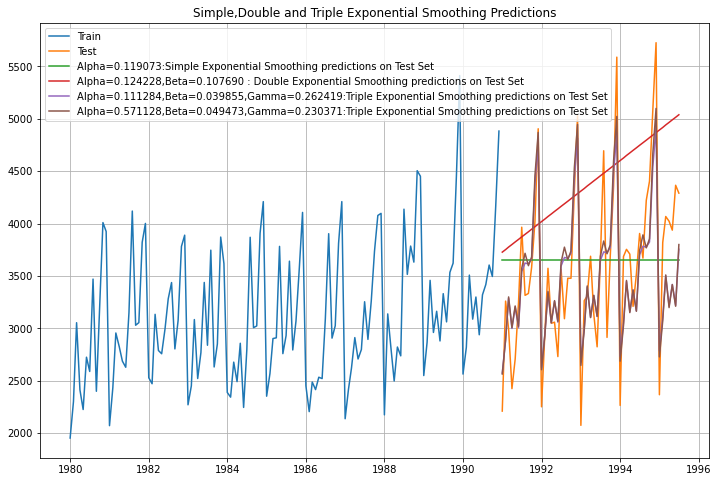

In [50]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.119073:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.124228,Beta=0.107690 : Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.111284,Beta=0.039855,Gamma=0.262419:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.571128,Beta=0.049473,Gamma=0.230371:Triple Exponential Smoothing predictions on Test Set')
 
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [51]:
print('TES_Multiplicative RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_Multiplicative RMSE: 447.7225807439294


In [52]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]},index=['Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",458.965392
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",447.722581


We can see that the Triple Exponential Smoothing Multiplicative model has performed the best.

## Building different models and comparing the accuracy metrics

### Model 1: Linear Regrression

In [53]:
print(bgl.shape)
print(train.shape)
print(test.shape)

(187, 1)
(132, 1)
(55, 1)


In [54]:
#We will take YearMonth as the independent variable and SoftDrinkProduction as dependent variable
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time Instance','\n',train_time)
print('Test Time Instance','\n',test_time)

Training Time Instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [55]:
print(len(train_time))
print(len(test_time))

132
55


In [56]:
#Taking the back up of the data
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [57]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

Now that our training and test data has been modified, let us go ahead and use Linear Regression to build the model on the training data and test the model on the test data

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'])

LinearRegression()

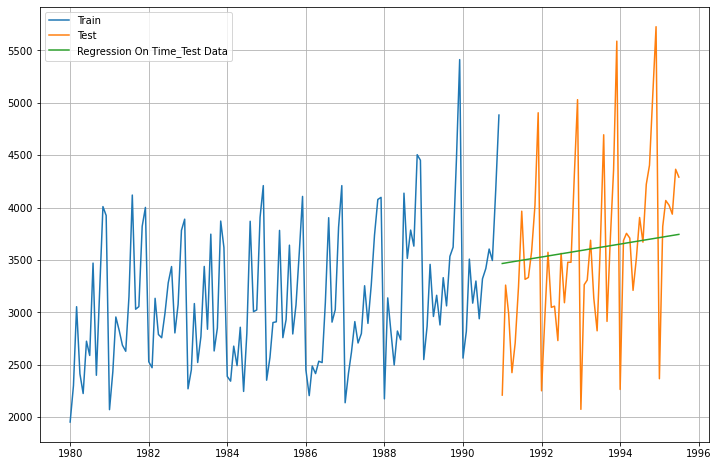

In [61]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

Defining the functions for calculating the accuracy metrics


In [62]:
from sklearn import metrics

### Model Evaluation

In [63]:
rmse_model1_test = metrics.mean_squared_error(test['SoftDrinkProduction'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 775.808 


In [64]:
resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",458.965392
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",447.722581
RegressionOnTime,775.807810


# Model 2: Naive Approach: y^t+1=yt

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [65]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [66]:
train.tail()

,SoftDrinkProduction
YearMonth,
1990-08-01,3418
1990-09-01,3604
1990-10-01,3495
1990-11-01,4163
1990-12-01,4882


In [67]:
NaiveModel_test['naive'] = np.asarray(train['SoftDrinkProduction'])[len(np.asarray(train['SoftDrinkProduction']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

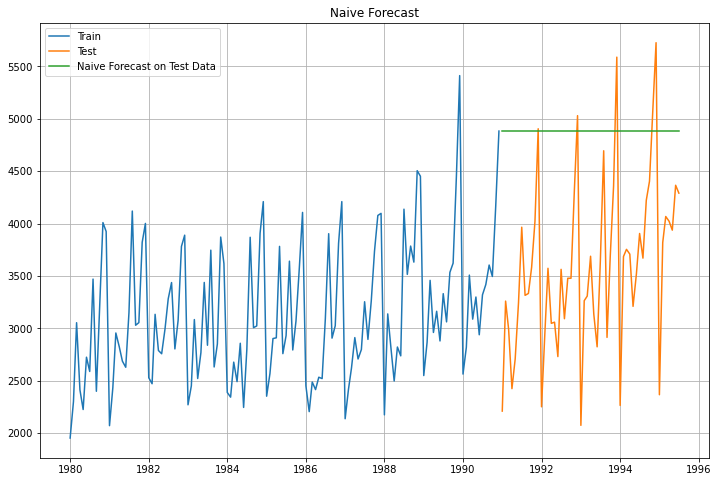

In [68]:
plt.plot(NaiveModel_train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [69]:
rmse_model2_test = metrics.mean_squared_error(test['SoftDrinkProduction'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1519.259


In [70]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",458.965392
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",447.722581
RegressionOnTime,775.807810
NaiveModel,1519.259233


# Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [71]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [72]:
SimpleAverage_test['mean_forecast'] = train['SoftDrinkProduction'].mean()
SimpleAverage_test.head()

,SoftDrinkProduction,mean_forecast
YearMonth,,
1991-01-01,2211,3124.166667
1991-02-01,3260,3124.166667
1991-03-01,2992,3124.166667
1991-04-01,2425,3124.166667
1991-05-01,2707,3124.166667


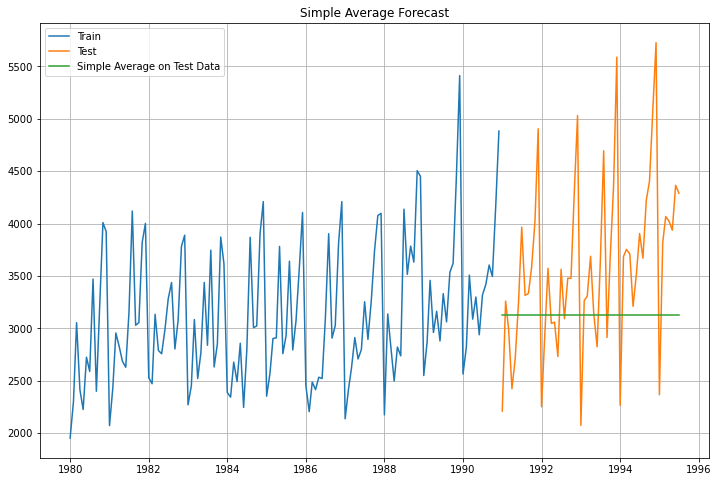

In [73]:
plt.plot(SimpleAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(SimpleAverage_test['SoftDrinkProduction'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model Evaluation

In [74]:
rmse_model3_test = metrics.mean_squared_error(test['SoftDrinkProduction'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 934.353


In [75]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",458.965392
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",447.722581
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358


# Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [76]:
MovingAverage = bgl.copy()
MovingAverage.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


Trailing moving averages

In [77]:
MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head()

,SoftDrinkProduction,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1954,NaN,NaN,NaN,NaN
1980-02-01,2302,2128.0,NaN,NaN,NaN
1980-03-01,3054,2678.0,NaN,NaN,NaN
1980-04-01,2414,2734.0,2431.0,NaN,NaN
1980-05-01,2226,2320.0,2499.0,NaN,NaN


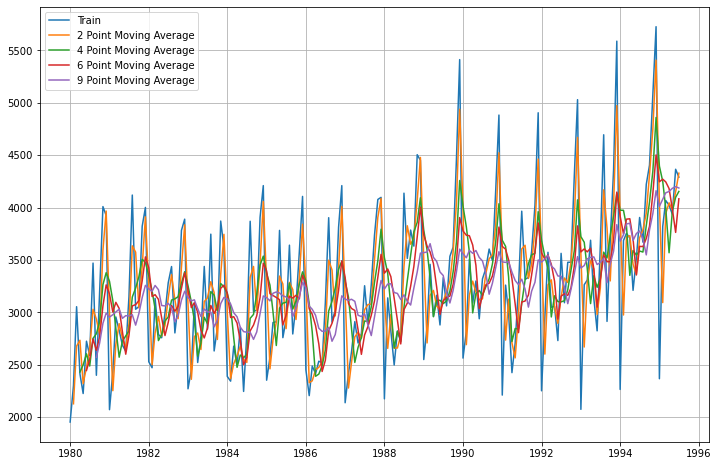

In [78]:
## Plotting on the whole data

plt.plot(MovingAverage['SoftDrinkProduction'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [79]:
#Creating train and test set
trailing_MovingAverage_train = MovingAverage[MovingAverage.index<'1991']
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

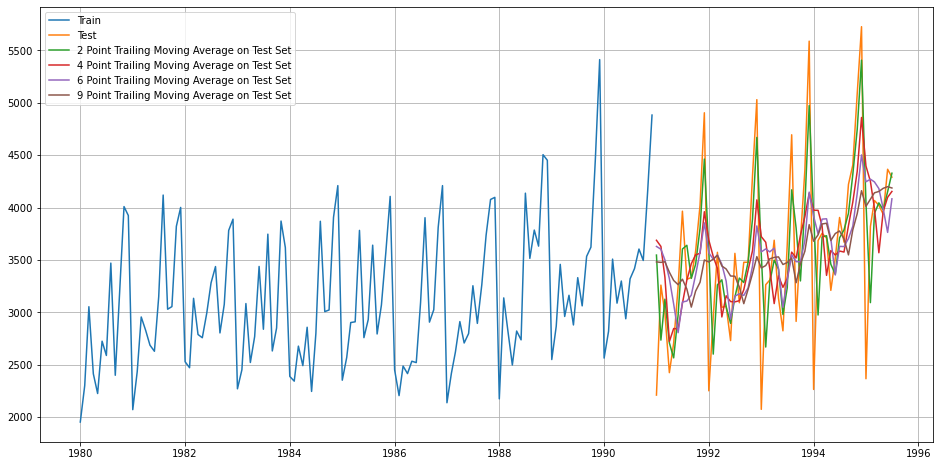

In [80]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['SoftDrinkProduction'], label='Train')
plt.plot(trailing_MovingAverage_test['SoftDrinkProduction'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

Model Evaluation

Done only on the test data.

In [81]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['SoftDrinkProduction'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 556.725
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 687.182
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 710.514
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 735.890


In [82]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9]},index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage','6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",458.965392
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",447.722581
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
2pointTrailingMovingAverage,556.725418
4pointTrailingMovingAverage,687.181726
6pointTrailingMovingAverage,710.513877


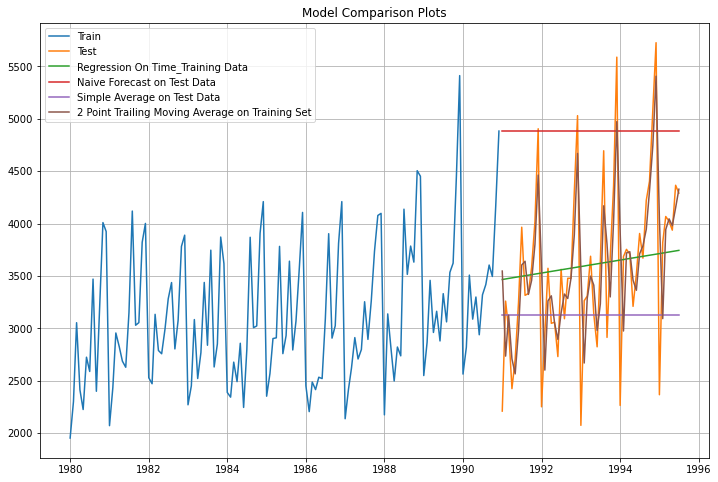

In [83]:
## Plotting on both Training and Test data

plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
dftest = adfuller(bgl,regression='ct')
print('DataFrame test statistic is %3.3f' %dftest[0])
print('DataFrame test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DataFrame test statistic is -0.425
DataFrame test p-value is 0.9861019765758295
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.


In [86]:
bgl.diff().dropna()
dftest = adfuller(bgl.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -9.481
DF test p-value is 3.053709292535948e-14
Number of lags used 11


Now, let us go ahead and plot the stationary series.

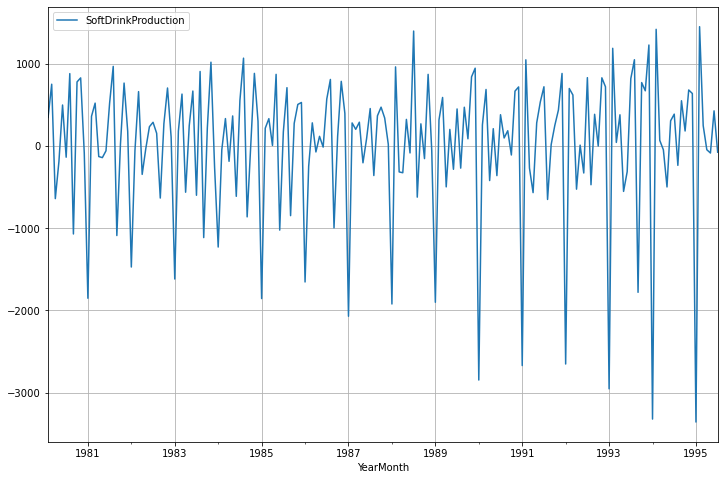

In [87]:
bgl.diff().dropna().plot(grid=True);

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

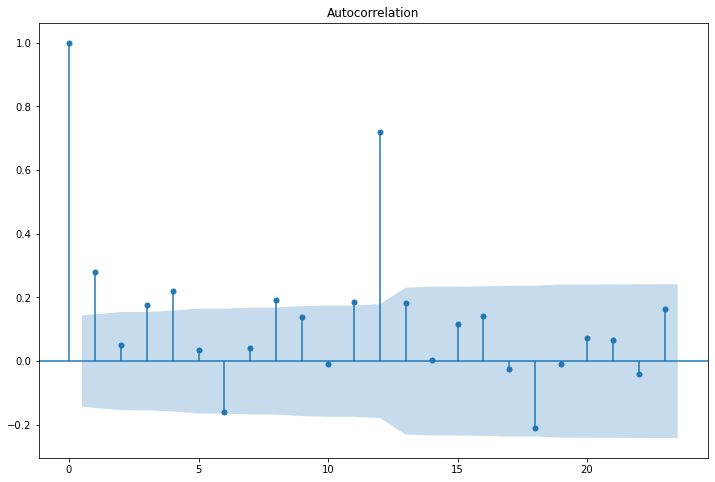

In [89]:
plot_acf(bgl,alpha=0.05);

From the above plots, we can say that there seems to be a seasonality in the data.


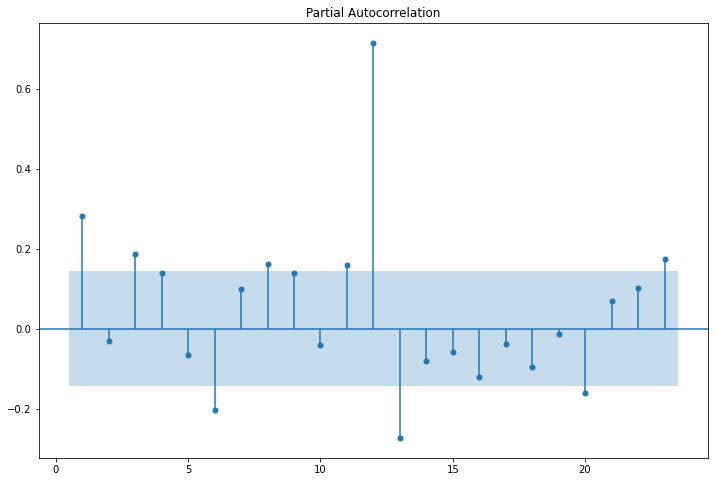

In [90]:
plot_pacf(bgl,zero=False,alpha=0.05);

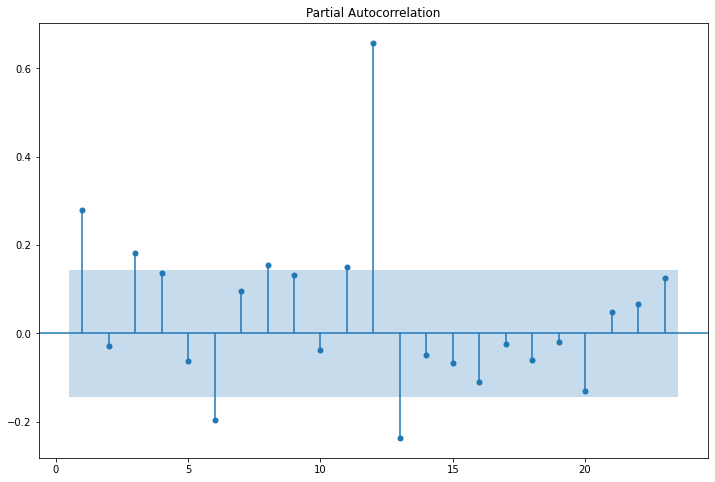

In [91]:
plot_pacf(bgl,zero=False,alpha=0.05,method='ywmle');

In [92]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [93]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


Last few rows of Training Data


,SoftDrinkProduction
YearMonth,
1990-08-01,3418
1990-09-01,3604
1990-10-01,3495
1990-11-01,4163
1990-12-01,4882


First few rows of Test Data


,SoftDrinkProduction
YearMonth,
1991-01-01,2211
1991-02-01,3260
1991-03-01,2992
1991-04-01,2425
1991-05-01,2707


Last few rows of Test Data


,SoftDrinkProduction
YearMonth,
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937
1995-06-01,4365
1995-07-01,4290


In [94]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

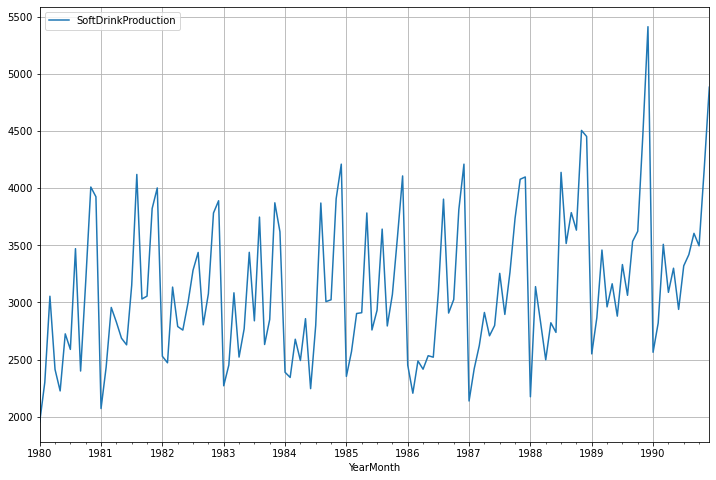

In [95]:
train.plot(grid=True);

In [96]:
dftest = adfuller(train,regression='ct')
print('DataFrame test statistic is %3.3f' %dftest[0])
print('DataFrame test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DataFrame test statistic is -1.649
DataFrame test p-value is 0.7726647141271693
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [97]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DataFrame test statistic is %3.3f' %dftest[0])
print('DataFrame test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DataFrame test statistic is -7.271
DataFrame test p-value is 3.4205181049970745e-09
Number of lags used 11


Now, let us go ahead and plot the differenced training data.

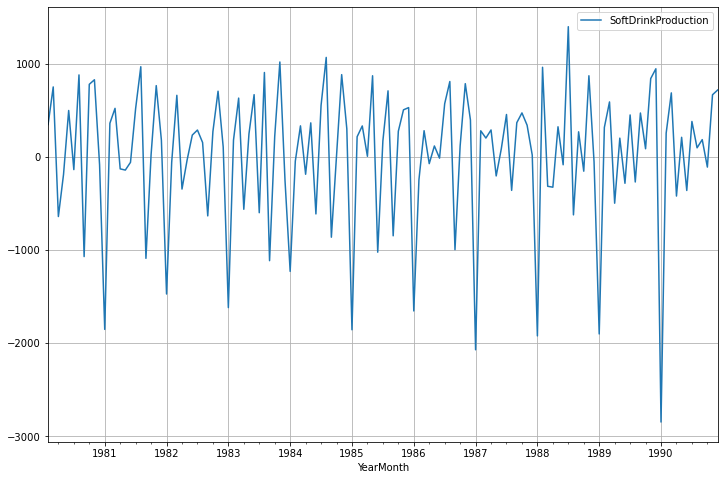

In [98]:
train.diff().dropna().plot(grid=True);

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [100]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 2 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [101]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [102]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['SoftDrinkProduction'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2103.7338336875
ARIMA(0, 1, 1) - AIC:2069.5996302114518
ARIMA(0, 1, 2) - AIC:2056.4892632434694
ARIMA(0, 1, 3) - AIC:2056.831789419076
ARIMA(1, 1, 0) - AIC:2097.8721216490417
ARIMA(1, 1, 1) - AIC:2061.523083934958
ARIMA(1, 1, 2) - AIC:2056.7156820689206
ARIMA(1, 1, 3) - AIC:2058.7121590365855
ARIMA(2, 1, 0) - AIC:2073.234860536023
ARIMA(2, 1, 1) - AIC:2059.100671812967
ARIMA(2, 1, 2) - AIC:2058.712702099876
ARIMA(2, 1, 3) - AIC:2057.0898772431656
ARIMA(3, 1, 0) - AIC:2070.3653671411857
ARIMA(3, 1, 1) - AIC:2058.304546211261
ARIMA(3, 1, 2) - AIC:2060.6799657021306
ARIMA(3, 1, 3) - AIC:2059.6037668767667


In [103]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
2,"(0, 1, 2)",2056.489263
6,"(1, 1, 2)",2056.715682
3,"(0, 1, 3)",2056.831789
11,"(2, 1, 3)",2057.089877
13,"(3, 1, 1)",2058.304546


In [104]:
auto_ARIMA = ARIMA(train, order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(0, 1, 2)   Log Likelihood               -1025.245
Date:                 Sun, 09 Jan 2022   AIC                           2056.489
Time:                         14:24:42   BIC                           2065.115
Sample:                     01-01-1980   HQIC                          2059.994
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5407      0.085     -6.392      0.000      -0.707      -0.375
ma.L2         -0.3913      0.113     -3.475      0.001      -0.612      -0.171
sigma2      3.572e+05   4.62e+04      7.725 

Diagnostics plot.

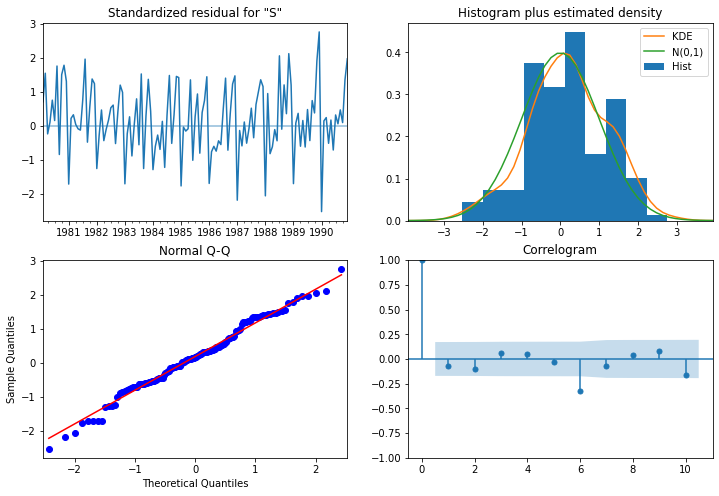

In [105]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [106]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [107]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [108]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 831.6158521331566 
MAPE: 18.494207973397934


In [109]:
resultsDf1 = pd.DataFrame({'RMSE': rmse,'MAPE':mape},index=['ARIMA(0,1,2)'])

resultsDf1

,RMSE,MAPE
"ARIMA(0,1,2)",831.615852,18.494208


In [110]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse]},index=['ARIMA(0,1,2) Lowest AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",458.965392
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",447.722581
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
2pointTrailingMovingAverage,556.725418
4pointTrailingMovingAverage,687.181726
6pointTrailingMovingAverage,710.513877


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more

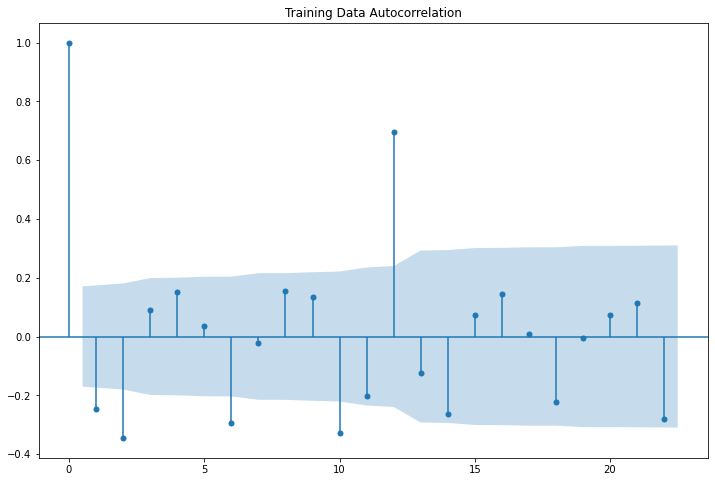

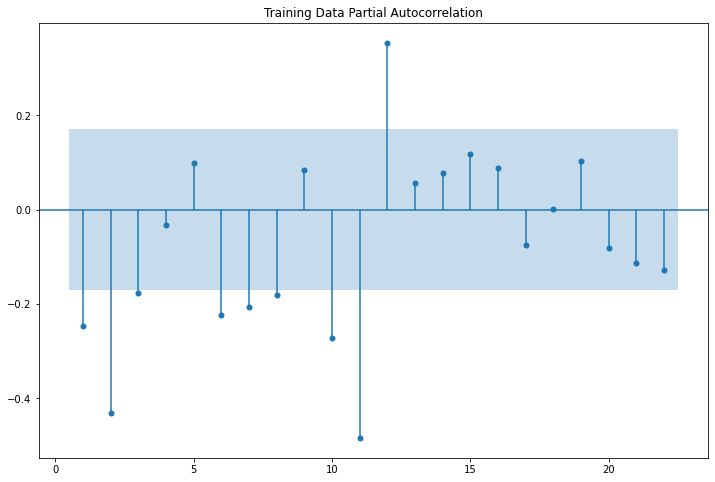

In [111]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we will take the value of p and q to be 3 and 2 respectively.

In [112]:
manual_ARIMA = ARIMA(train['SoftDrinkProduction'], order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  132
Model:                  ARIMA(3, 1, 2)   Log Likelihood               -1024.340
Date:                 Sun, 09 Jan 2022   AIC                           2060.680
Time:                         14:24:46   BIC                           2077.931
Sample:                     01-01-1980   HQIC                          2067.690
                          - 12-01-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3216      0.460     -0.700      0.484      -1.223       0.579
ar.L2         -0.0001      0.189     -0.001      0.999      -0.371       0.370
ar.L3         -0.0227      0.218     -0.104 

Let us analyse the residuals from the various diagnostics plot.

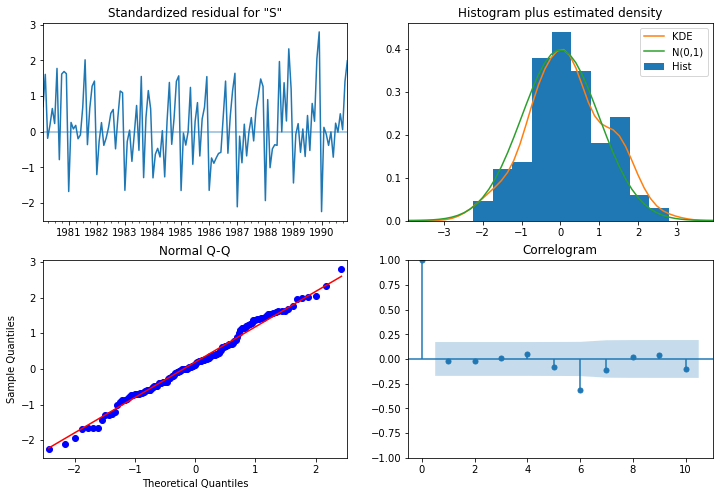

In [113]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [114]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [115]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 822.217444645557 
MAPE: 18.363068954479175


In [116]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape},index=['ARIMA(3,1,2)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,RMSE,MAPE
"ARIMA(0,1,2)",831.615852,18.494208
"ARIMA(3,1,2)",822.217445,18.363069


In [117]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse]},index=['ARIMA(3,1,2)By looking ACF and PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",458.965392
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",447.722581
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
2pointTrailingMovingAverage,556.725418
4pointTrailingMovingAverage,687.181726
6pointTrailingMovingAverage,710.513877


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

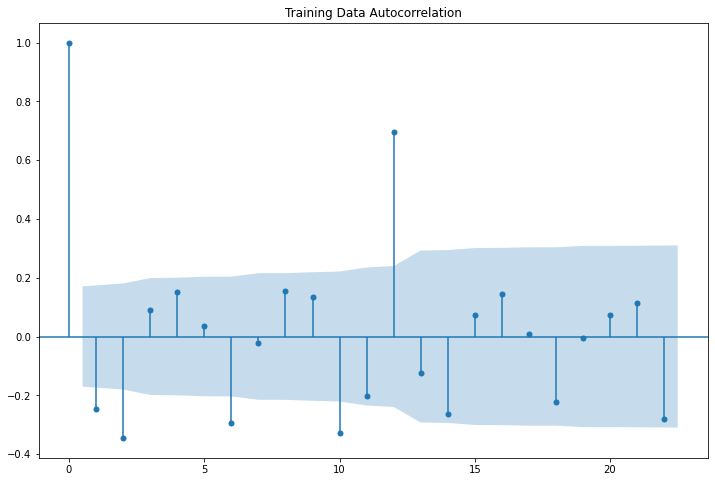

In [118]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality. Seasonality = 6

In [119]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [120]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [121]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1991.6865911398422
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1835.7619130468058
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1746.6922157437966
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2001.2435317896568
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1938.055937089127
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1819.7378453343078
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1714.4573257054753
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1790.6600051597607
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1790.4200189619835
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1765.5917652590535
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1681.213865056899
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1704.3326684928627
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1702.2015504499402
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1694.5477919271918
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1682.898637603519
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2035.4871783907797
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1932.6082414352384
SARIMA(0, 1, 1)x(0, 0, 2, 6) - 

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1719.363517689222
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1701.232894800044
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1620.1096652739448
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1635.6455744795298
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1633.993021903282
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1620.0481713483036
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1622.0031571198062
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2008.4721966059778
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1908.9486128332169
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1763.9211659233306
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1676.0428744299275
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1912.2181766642184
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1846.1807234475168
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1732.0128296266612
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1635.9397226756369
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1718.7161727501546
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1720.2266168611586
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1689.3722234457805
SARIMA(2, 1, 2)x(2, 0, 3, 6) - 

In [122]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
255,"(3, 1, 3)","(3, 0, 3, 6)",1589.760962
59,"(0, 1, 3)","(2, 0, 3, 6)",1590.244407
191,"(2, 1, 3)","(3, 0, 3, 6)",1591.011959
123,"(1, 1, 3)","(2, 0, 3, 6)",1591.284675
63,"(0, 1, 3)","(3, 0, 3, 6)",1592.243831


In [123]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(3, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:               SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -781.880
Date:                           Sun, 09 Jan 2022   AIC                           1589.761
Time:                                   14:30:34   BIC                           1624.748
Sample:                               01-01-1980   HQIC                          1603.950
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8582      0.139      6.167      0.000       0.585       1.131
ar.L2         -1.0002      0.104     -9.654

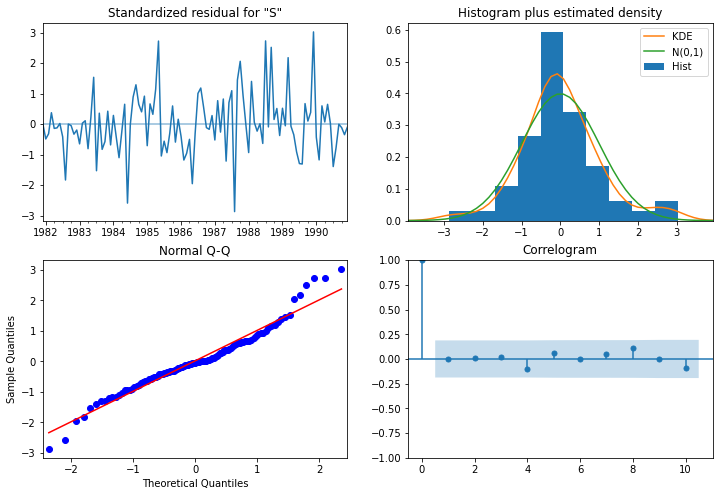

In [124]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [125]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [126]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

SoftDrinkProduction,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,2810.754060,302.172609,2218.506630,3403.001490
1991-02-01,3144.759464,305.528186,2545.935224,3743.583704
1991-03-01,3279.034107,307.965981,2675.431875,3882.636338
1991-04-01,2957.418178,318.955464,2332.276957,3582.559399
1991-05-01,3330.305230,326.691973,2690.000730,3970.609730


In [127]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 428.68312547435875 
MAPE: 10.86586083696877


In [128]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(3,0,3,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,RMSE,MAPE
"ARIMA(0,1,2)",831.615852,18.494208
"ARIMA(3,1,2)",822.217445,18.363069
"SARIMA(3,1,3)(3,0,3,6)",428.683125,10.865861


In [129]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse]},index=['SARIMA(3,1,3)(3,0,3,6)Lowest AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",458.965392
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",447.722581
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
2pointTrailingMovingAverage,556.725418
4pointTrailingMovingAverage,687.181726
6pointTrailingMovingAverage,710.513877


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

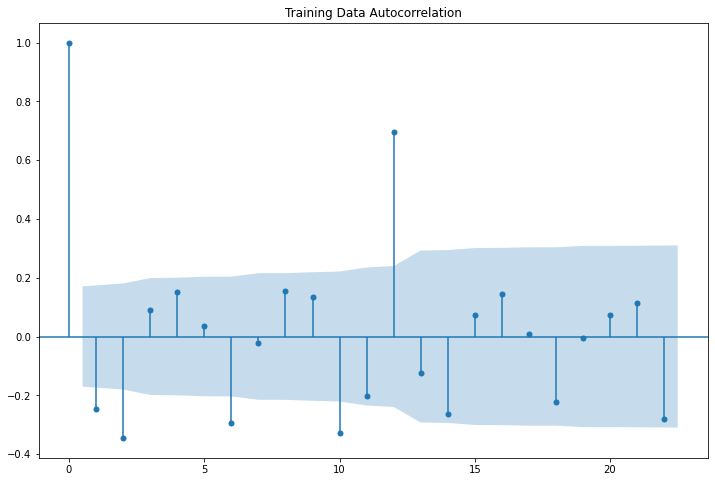

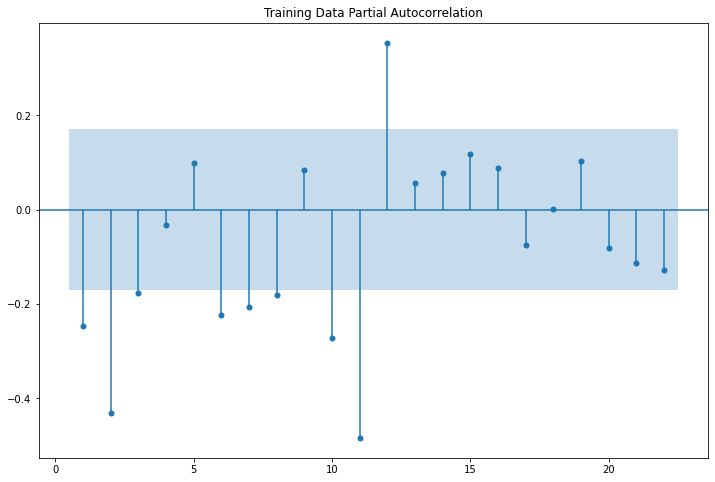

In [130]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We are taking the p value to be 3 and the q value also to be 2 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 6. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [131]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'],
                                order=(3,1,2),
                                seasonal_order=(6, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                SoftDrinkProduction   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(6, 0, [], 6)   Log Likelihood                -667.816
Date:                            Sun, 09 Jan 2022   AIC                           1359.632
Time:                                    14:30:47   BIC                           1389.893
Sample:                                01-01-1980   HQIC                          1371.845
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2520      1.160     -0.217      0.828      -2.526       2.022
ar.L2          0.0041      0.179   

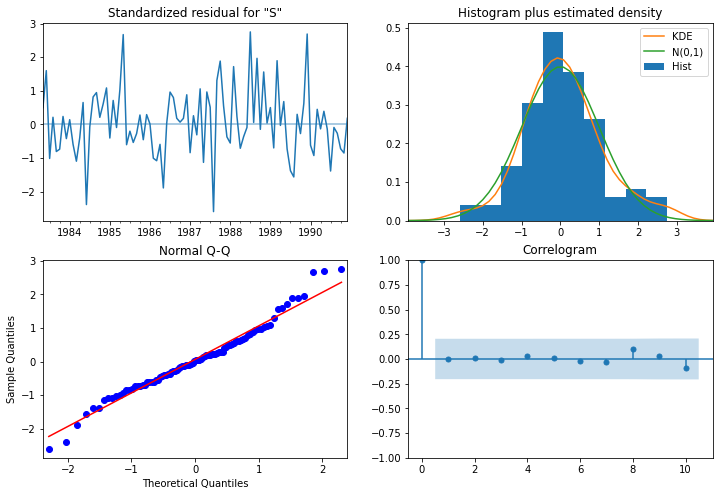

In [132]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [133]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [134]:
rmse = mean_squared_error(test['SoftDrinkProduction'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['SoftDrinkProduction'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 452.7660044226601 
MAPE: 11.652814042195676


In [135]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,2)(6,0,0,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,RMSE,MAPE
"ARIMA(0,1,2)",831.615852,18.494208
"ARIMA(3,1,2)",822.217445,18.363069
"SARIMA(3,1,3)(3,0,3,6)",428.683125,10.865861
"SARIMA(3,1,2)(6,0,0,6)",452.766004,11.652814


In [136]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse]},index=['SARIMA(3,1,2)(6,0,0,6)By looking ACF and PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
"Alpha=0.119073,SES",809.501640
"Alpha=1,Beta=0.0189:DES",1074.329153
"Alpha=0.570714,Beta=0.0001,Gamma=0.293721:TES(Additive)",458.965392
"Alpha=0.571128,Beta=0.000147,Gamma=0.202947,Gamma=0:TES(Multiplicative)",447.722581
RegressionOnTime,775.807810
NaiveModel,1519.259233
SimpleAverageModel,934.353358
2pointTrailingMovingAverage,556.725418
4pointTrailingMovingAverage,687.181726
6pointTrailingMovingAverage,710.513877


This is where our model building exercise ends. 

### Building the most optimum model on the Full Data.

The models chosen are:
- Triple Exponential Smoothing (Multiplicative)
- SARIMA(3,1,3)(3,0,3,6)Lowest AIC

# Triple Exponential Smoothing

In [138]:
# Initializing the Triple Exponential Smoothing Model
model_TES_forecast = ExponentialSmoothing(bgl,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_forecast = model_TES_forecast.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters')
print('')
print(model_TES_forecast.params)


Holt Winters model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.11106654743143124, 'smoothing_trend': 0.07404098381194825, 'smoothing_seasonal': 0.26337577524253064, 'damping_trend': nan, 'initial_level': 2803.1458007954316, 'initial_trend': 18.01071167443894, 'initial_seasons': array([0.77166845, 0.84661857, 1.02666958, 0.91264243, 0.92504042,
       0.9639686 , 1.01880509, 1.23480663, 0.96730349, 1.06022107,
       1.31971916, 1.35523162]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [139]:
print(model_TES_forecast.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:      SoftDrinkProduction   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                       20915279.954
Optimized:                         True   AIC                           2205.853
Trend:                         Additive   BIC                           2257.551
Seasonal:                Multiplicative   AICC                          2209.924
Seasonal Periods:                    12   Date:                 Sun, 09 Jan 2022
Box-Cox:                          False   Time:                         14:34:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1110665                alpha                 True
smoothing_trend          

In [140]:
TES_predict_forecast =  model_TES_forecast.forecast(steps=12)
TES_predict_forecast

1995-08-01    4529.234491
1995-09-01    4348.812375
1995-10-01    4665.193018
1995-11-01    5539.806082
1995-12-01    6481.529179
1996-01-01    2881.680844
1996-02-01    4231.098900
1996-03-01    4492.998841
1996-04-01    4328.110489
1996-05-01    4146.669529
1996-06-01    4250.042687
1996-07-01    4873.894549
Freq: MS, dtype: float64

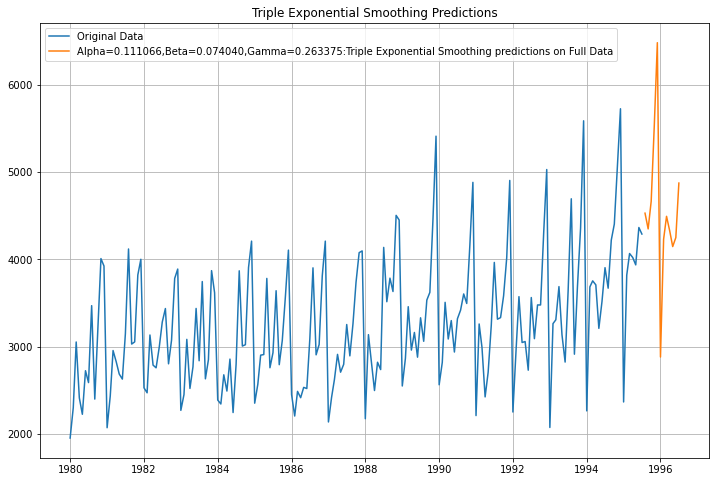

In [156]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(bgl, label='Original Data')

plt.plot(TES_predict_forecast, label='Alpha=0.111066,Beta=0.074040,Gamma=0.263375:Triple Exponential Smoothing predictions on Full Data')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [142]:
pred = TES_predict_forecast.summary_frame(alpha=0.05)
pred.head()

AttributeError: 'Series' object has no attribute 'summary_frame'

In [143]:
rmse = mean_squared_error(bgl['SoftDrinkProduction'],TES_predict_forecast,squared=False)
print('RMSE of the Full Model',rmse)
#print('TES RMSE:',mean_squared_error(TES_predict_forecast.values,bgl.values,squared=False))

ValueError: Found input variables with inconsistent numbers of samples: [187, 12]

# SARIMA(3,1,3)(3,0,3,6)Lowest AIC

In [146]:
full_data_model = sm.tsa.statespace.SARIMAX(bgl['SoftDrinkProduction'],
                                order=(3,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:               SoftDrinkProduction   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 6)   Log Likelihood               -1191.191
Date:                           Sun, 09 Jan 2022   AIC                           2408.382
Time:                                   14:40:42   BIC                           2448.680
Sample:                               01-01-1980   HQIC                          2424.741
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8239      0.663     -1.242      0.214      -2.124       0.476
ar.L2         -0.1856      0.635     -0.292

## Evaluate the model on the whole data and predict 12 months into the future

In [147]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [148]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

SoftDrinkProduction,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,4332.475336,338.018526,3669.971198,4994.979473
1995-09-01,4221.920105,340.252490,3555.037479,4888.802731
1995-10-01,4516.842340,341.559592,3847.397842,5186.286839
1995-11-01,5245.001223,343.621182,4571.516082,5918.486363
1995-12-01,6018.332460,352.826077,5326.806056,6709.858864


In [157]:
pred_full_manual_SARIMA_date

SoftDrinkProduction,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,4332.475336,338.018526,3669.971198,4994.979473
1995-09-01,4221.920105,340.252490,3555.037479,4888.802731
1995-10-01,4516.842340,341.559592,3847.397842,5186.286839
1995-11-01,5245.001223,343.621182,4571.516082,5918.486363
1995-12-01,6018.332460,352.826077,5326.806056,6709.858864
1996-01-01,2926.501317,355.694775,2229.352368,3623.650266
1996-02-01,4140.655859,357.525834,3439.918101,4841.393618
1996-03-01,4300.039035,360.355047,3593.756120,5006.321949
1996-04-01,4192.893898,365.521500,3476.484923,4909.302874
1996-05-01,4070.052108,368.632006,3347.546652,4792.557564


In [150]:
rmse = mean_squared_error(bgl['SoftDrinkProduction'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 446.4070866628458


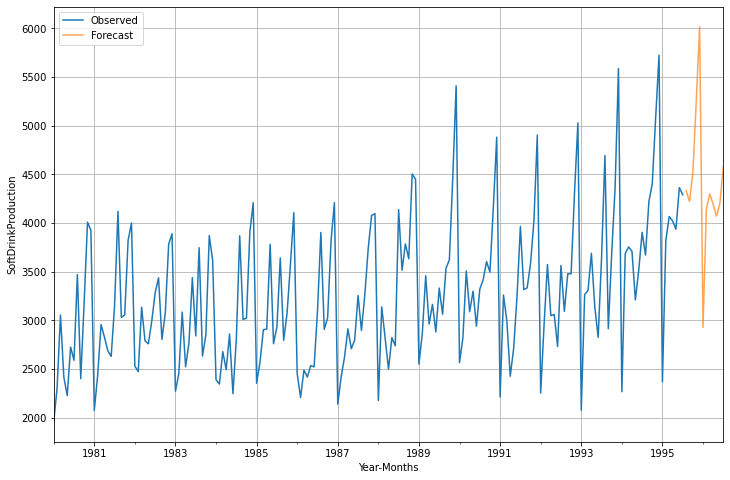

In [154]:
axis = bgl['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.grid();

# END